# Text Processing and Sentiment Analysis

# Loading the necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import nltk
import spacy
from tqdm import tqdm
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data

In [2]:
data=pd.read_excel( 'Review_Data_All.xlsx',sheet_name=1)

In [3]:
data.head()

,Rating,Review Date,Review Paragarph,Review Title,Site
0,1,2019-05-01,"I went to 24/7 in the Lalit Hotel, with its fi...","horrendous Service, never recommended.",TripAdvisor
1,5,2019-05-01,"Must visit, great staff , great managment , fo...",Perfect dine,TripAdvisor
2,4,2019-03-01,Food is very good. Breakfast very good variety...,GOOD FOOD,TripAdvisor
3,5,2019-04-01,Amazing staff My purpose of visit was busines...,Work from Home,TripAdvisor
4,1,2019-04-01,Hi You must be wondering why I have tested th...,Worst five star restaurant - tested many times,TripAdvisor


# Text Pre-processing

In [4]:
data['Review Paragarph'][3]

'Amazing staff  My purpose of visit was business. VERY important meeting  Since i was coughing due to throat infection,. Dalip made kadha for me,help me feel better,so I could continue with my meeting. Mariam took special care of my client and me.  Arjun the Manager...More'

In [5]:
data['Review Paragarph'][10]

'Was there for Dinner and Breakfast.  There is a lot of variety on the menu. However found the service a little lopsided. Some went out of the way, other time was totally ignored and it was not a busy time. Food was good.More'

# Basic Text Processing (Case Conversions, Punctuation Removal)

In [6]:
replace_1 = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])")

# function to clean text data
def clean_reviews(reviews):
    reviews = [replace_1.sub("", line.lower()) for line in reviews]
    return reviews

In [7]:
data['Review Paragarph'] = clean_reviews(data['Review Paragarph'])

In [8]:
data['Review Paragarph'][3]

'amazing staff  my purpose of visit was business very important meeting  since i was coughing due to throat infection dalip made kadha for mehelp me feel betterso i could continue with my meeting mariam took special care of my client and me  arjun the managermore'

In [9]:
data['Review Paragarph'][10]

'was there for dinner and breakfast  there is a lot of variety on the menu however found the service a little lopsided some went out of the way other time was totally ignored and it was not a busy time food was goodmore'

# Top 10 high frequency words

#let's see which are the top most frequent words in the data.

In [10]:
from nltk import FreqDist

In [11]:
# function to plot top n most frequent words
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
  # selecting top n most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

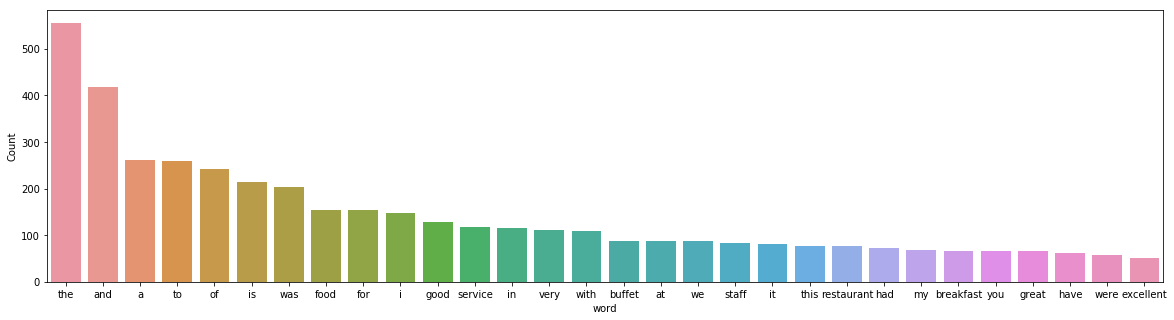

In [12]:
freq_words(data['Review Paragarph'])

In [13]:
import en_core_web_sm

In [14]:
nlp = en_core_web_sm.load()

# Tokenization

In [15]:
# tokenization using spaCy
def tokenization(x):
    reviews_tokens = []
    for i in tqdm(x):
        i = nlp(i)
        temp = []
        for j in i:
            temp.append(j.text)
        reviews_tokens.append(temp)
    
    return reviews_tokens

In [16]:
data['tokenized_Review Paragarph'] = tokenization(data['Review Paragarph'])

100%|██████████| 295/295 [00:03<00:00, 93.01it/s] 


# Stop Word removal

In [17]:
# function to remove stopwords
def strip_stopwords(reviews):
    s = []
    for r in tqdm(reviews):
        s_2 = []
        for token in r:
            if nlp.vocab[token].is_stop == True:
                continue
            else:
                s_2.append(token)
        s.append(" ".join(s_2))    
        
    return s

In [18]:
data['Review Paragarph_cleaned'] = strip_stopwords(data['tokenized_Review Paragarph'])

100%|██████████| 295/295 [00:00<00:00, 42265.40it/s]


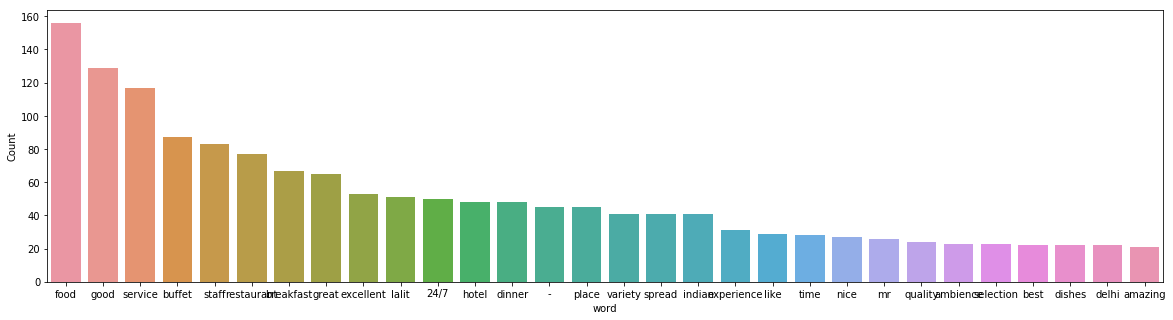

In [19]:
freq_words(data['Review Paragarph_cleaned'])

In [20]:
# remove 1 character terms (length == 1)
data['Review Paragarph_cleaned'] =data['Review Paragarph_cleaned'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))

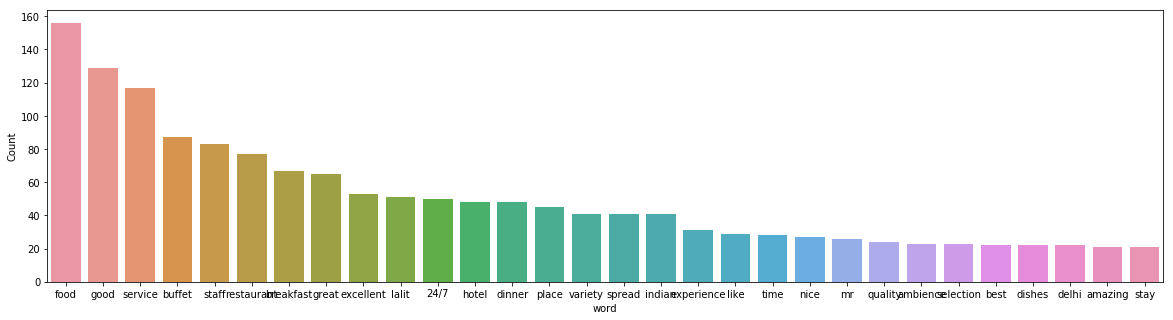

In [21]:
freq_words(data['Review Paragarph_cleaned'])

# Conclusion
Top 10 Frequency words are(food,good,service,buffet,staff,restaurant,breakfast,great,excellent)

In [22]:
data.head()

,Rating,Review Date,Review Paragarph,Review Title,Site,tokenized_Review Paragarph,Review Paragarph_cleaned
0,1,2019-05-01,i went to 24/7 in the lalit hotel with its fin...,"horrendous Service, never recommended.",TripAdvisor,"[i, went, to, 24/7, in, the, lalit, hotel, wit...",went 24/7 lalit hotel fine taste service dimin...
1,5,2019-05-01,must visit great staff great managment food ...,Perfect dine,TripAdvisor,"[must, visit, great, staff, , great, managmen...",visit great staff great managment food qulatit...
2,4,2019-03-01,food is very good breakfast very good variety ...,GOOD FOOD,TripAdvisor,"[food, is, very, good, breakfast, very, good, ...",food good breakfast good variety open little e...
3,5,2019-04-01,amazing staff my purpose of visit was busines...,Work from Home,TripAdvisor,"[amazing, staff, , my, purpose, of, visit, wa...",amazing staff purpose visit business important...
4,1,2019-04-01,hi you must be wondering why i have tested th...,Worst five star restaurant - tested many times,TripAdvisor,"[hi, , you, must, be, wondering, why, i, have...",hi wondering tested times lalit loyalty member...


In [23]:
data.shape

(295, 7)

# Check Polarity Score

#Calculate Polarity Score using Vader Sentiment Analysis

In [24]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [25]:
analyser = SentimentIntensityAnalyzer()

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 7 columns):
Rating                        295 non-null int64
Review Date                   285 non-null datetime64[ns]
Review Paragarph              295 non-null object
Review Title                  295 non-null object
Site                          295 non-null object
tokenized_Review Paragarph    295 non-null object
Review Paragarph_cleaned      295 non-null object
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 16.3+ KB


In [27]:
# Sentiment Analysis using Vader
FinalResults_Vader = pd.DataFrame()

# Create engine
analyzer = SentimentIntensityAnalyzer()

# Run Engine
for i in range(0, data.shape[0]):
    
    snt = analyzer.polarity_scores(data.iloc[i,6])
    
    temp = pd.DataFrame({'Reviews': data.iloc[i,6], 'Polarity Score': list(snt.items())[3][1]},index=[0])

    FinalResults_Vader = FinalResults_Vader.append(temp)  

In [28]:
FinalResults_Vader.head()

,Reviews,Polarity Score
0,went 24/7 lalit hotel fine taste service dimin...,-0.6690
0,visit great staff great managment food qulatit...,0.9451
0,food good breakfast good variety open little e...,0.8271
0,amazing staff purpose visit business important...,0.8885
0,hi wondering tested times lalit loyalty member...,-0.1779


# define a function for Positive, Negative and Neutral Reviews

In [29]:
def f(x):
    ''' for polarity'''
    if (x >=0.1):
        return '1'
    elif (x <= -0.1):
        return '-1'
    elif (x >= -0.1) and (x <= 0.1):
        return '0'

In [30]:
FinalResults_Vader['Polarity'] = FinalResults_Vader['Polarity Score'].apply(f)

In [31]:
FinalResults_Vader.shape

(295, 3)

In [32]:
FinalResults_Vader.set_index(np.arange(0,295),inplace=True)

# percentage of polarity of reviews

In [34]:
FinalResults_Vader.groupby('Polarity').count()

,Reviews,Polarity Score
Polarity,,
-1,20,20
0,15,15
1,260,260


In [35]:
Pol_Perc_Positive= (260/295)*100

In [36]:
print(Pol_Perc_Positive)

88.13559322033898


In [37]:
Pol_Perc_Negative= (20/295)*100

In [38]:
print(Pol_Perc_Negative)

6.779661016949152


In [39]:
Pol_Perc_Neutral= (15/295)*100

In [40]:
print(Pol_Perc_Neutral)

5.084745762711865


# Conclusion
There are more positive reviews(88%) in the given data

# Identify most Positive,Negative and Neutral Review

#most positive review

In [41]:
FinalResults_Vader['Polarity Score'].max()

0.9773

In [42]:
FinalResults_Vader[FinalResults_Vader['Polarity Score']==0.9773]

,Reviews,Polarity Score,Polarity
102,awesome breakfast awesome buffet spread delici...,0.9773,1


#most negative review

In [43]:
FinalResults_Vader['Polarity Score'].min()

-0.8481

In [44]:
FinalResults_Vader[FinalResults_Vader['Polarity Score']==-0.8481]

,Reviews,Polarity Score,Polarity
75,week stay lilit new delhi breakfast stunningly...,-0.8481,-1


#neutral review

In [45]:
FinalResults_Vader[FinalResults_Vader['Polarity Score']==0]

,Reviews,Polarity Score,Polarity
9,went late dinner buffet looked bit cold ordere...,0.0,0
85,restaurant choice stay lalit 24/7 restaurant t...,0.0,0
105,hungry exercise visited place food thorough va...,0.0,0
109,lunch stay buffet spread elaborate quality foo...,0.0,0
124,finest place central delhi cooperative staff s...,0.0,0
206,work lalit barakhmaba occasionally client meet...,0.0,0
270,stayed lalit nights business restaurant breakf...,0.0,0


# Vectorization
Currently, we have the messages as lists of tokens (also known as lemmas) and now we need to convert each of those messages 
into a vector the SciKit Learn's algorithm models can work with.Now we'll convert each message, represented as a list of tokens
(lemmas) above, into a vector that machine learning models can understand.

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
# Might take awhile...
bow_transformer = CountVectorizer().fit(FinalResults_Vader['Reviews'])
# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

1738


In [49]:
FinalResults_Vader.head()

,Reviews,Polarity Score,Polarity
0,went 24/7 lalit hotel fine taste service dimin...,-0.6690,-1
1,visit great staff great managment food qulatit...,0.9451,1
2,food good breakfast good variety open little e...,0.8271,1
3,amazing staff purpose visit business important...,0.8885,1
4,hi wondering tested times lalit loyalty member...,-0.1779,-1


Let's take one text message and get its bag-of-words counts as a vector, putting to use our new bow_transformer:

In [50]:
Reviews4 =FinalResults_Vader['Reviews'][0]
print(Reviews4)

went 24/7 lalit hotel fine taste service diminishes completely destroys experience dhabha sit restaurant staff completely ignorant orderedmore


Now let's see its vector representation:

In [52]:
bow4 = bow_transformer.transform([Reviews4])
print(bow4)
print(bow4.shape)

  (0, 17)	1
  (0, 324)	2
  (0, 428)	1
  (0, 430)	1
  (0, 440)	1
  (0, 549)	1
  (0, 592)	1
  (0, 742)	1
  (0, 763)	1
  (0, 859)	1
  (0, 1071)	1
  (0, 1281)	1
  (0, 1355)	1
  (0, 1398)	1
  (0, 1455)	1
  (0, 1522)	1
  (0, 1688)	1
(1, 1738)


Now we can use transform on our Bag-of-Words (bow) transformed object and transform the entire DataFrame of Reviews

In [53]:
Reviews_bow = bow_transformer.transform(FinalResults_Vader['Reviews'])

# TF-IDF(term frequency-inverse document frequency)
TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).
IDF(t) = log_e(Total number of documents / Number of documents with term t in it).
Example:Consider a document containing 100 words wherein the word cat appears 3 times.
The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. 
Now, assume we have 10 million documents and the word cat appears in one thousand of these. 
Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4.
Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.

In [54]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(Reviews_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 1688)	0.1891158153030631
  (0, 1522)	0.1808203831118496
  (0, 1455)	0.11082653321837517
  (0, 1398)	0.269920803568571
  (0, 1355)	0.09561716720472235
  (0, 1281)	0.11856647847563352
  (0, 1071)	0.289493124089743
  (0, 859)	0.1360843918529978
  (0, 763)	0.289493124089743
  (0, 742)	0.14139427607163285
  (0, 592)	0.289493124089743
  (0, 549)	0.16040854087605536
  (0, 440)	0.289493124089743
  (0, 430)	0.289493124089743
  (0, 428)	0.289493124089743
  (0, 324)	0.49052519179662185
  (0, 17)	0.12451507599688907


To transform the entire bag-of-words corpus into TF-IDF corpus at once:

In [56]:
Reviews_tfidf = tfidf_transformer.transform(Reviews_bow)
print(messages_tfidf.shape)

(295, 1738)


# Training a model
With Reviews represented as vectors, we can finally train our data. Now we can actually use almost any sort
of classification algorithms. Lets use Logistic Regression.

In [57]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr_model= LogisticRegression().fit(Reviews_tfidf, FinalResults_Vader['Polarity'])

C:\Users\NANINE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\NANINE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [59]:
print('predicted:', lr_model.predict(tfidf4)[0])
print('expected:', FinalResults_Vader.Polarity[3])

predicted: 1
expected: 1


We've developed a model that can attempt to predict Sentiment(Polarity)

# Model Evaluation
Now we want to determine how well our model will do overall on the entire dataset. Let's begin by getting all the predictions:

In [60]:
all_predictions = lr_model.predict(Reviews_tfidf)
print(all_predictions)

['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1

In [61]:
from sklearn.metrics import classification_report
print (classification_report(FinalResults_Vader['Polarity'], all_predictions))

C:\Users\NANINE\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        20
           0       0.00      0.00      0.00        15
           1       0.88      1.00      0.94       260

    accuracy                           0.88       295
   macro avg       0.29      0.33      0.31       295
weighted avg       0.78      0.88      0.83       295



# Train Test Split
A proper way is to split the data into a training/test set, where the model only ever sees the training data during its model 
fitting and parameter tuning. The test data is never used in any way.Our final evaluation on test data is 
representative of true predictive performance.

Train Test Split Let's split our data into training and testing data.

In [62]:
from sklearn.model_selection import train_test_split

Review_train, Review_test, Polarity_train, Polarity_test = \
train_test_split(FinalResults_Vader['Reviews'], FinalResults_Vader['Polarity'], test_size=0.2)

print(len(Review_train), len(Review_test), len(Review_train) + len(Review_test))

236 59 295


# Creating a Data Pipeline
Let's run our model again and then predict off the test set. 

In [63]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()),  # train on TF-IDF vectors with Logistic Regression
])

In [64]:
pipeline.fit(Review_train,Polarity_train)

C:\Users\NANINE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\NANINE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling

In [65]:
predictions = pipeline.predict(Review_test)

In [66]:
print(classification_report(predictions,Polarity_test))

C:\Users\NANINE\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00         0
           1       1.00      0.86      0.93        59

    accuracy                           0.86        59
   macro avg       0.33      0.29      0.31        59
weighted avg       1.00      0.86      0.93        59



In [67]:
print(lr_model.coef_)

[[-0.01689254 -0.10482867  0.25789548 ... -0.04492497 -0.02003151
  -0.01514125]
 [-0.01808808  0.13858509 -0.016645   ... -0.04234618 -0.02042378
  -0.01152959]
 [ 0.0310175  -0.04527986 -0.23747827 ...  0.08121908  0.03657872
   0.02189645]]


In [68]:
lr_model.coef_.max()

1.2047010995299323